In [1]:
import aho_corasick
import bird_baker
import utils
import numpy as np
import cv2

# Testing Aho-Corasick algorithm

Each node in built trie is associated with:

- id 

- state: Accepting (one or more patterns) or NotAccepting

- failure link (when node cannot match given character it 'fails' using failure link) 

Note that root 'fails' to itself.

In [2]:
text = "earch"
patterns = ['search', 'ear', 'arch', 'chart']
root = aho_corasick.preprocess(patterns)

print(root)
print('Final states:', root.get_final_states())

aho_corasick.print_matches(text, patterns)

---Root---
Node#0, v = ROOT, output = NoT Accepting, fail = #0
 Node#1, v = s, output = NoT Accepting, fail = #0
  Node#2, v = e, output = NoT Accepting, fail = #7
   Node#3, v = a, output = NoT Accepting, fail = #8
    Node#4, v = r, output = {Accepting(1)}, fail = #9
     Node#5, v = c, output = NoT Accepting, fail = #12
      Node#6, v = h, output = {Accepting(2), Accepting(0)}, fail = #13
 Node#7, v = e, output = NoT Accepting, fail = #0
  Node#8, v = a, output = NoT Accepting, fail = #10
   Node#9, v = r, output = {Accepting(1)}, fail = #11
 Node#10, v = a, output = NoT Accepting, fail = #0
  Node#11, v = r, output = NoT Accepting, fail = #0
   Node#12, v = c, output = NoT Accepting, fail = #14
    Node#13, v = h, output = {Accepting(2)}, fail = #15
 Node#14, v = c, output = NoT Accepting, fail = #0
  Node#15, v = h, output = NoT Accepting, fail = #0
   Node#16, v = a, output = NoT Accepting, fail = #10
    Node#17, v = r, output = NoT Accepting, fail = #11
     Node#18, v = t, ou

In [3]:
patterns = ['baa', 'abb', 'bab']
root = aho_corasick.preprocess(patterns)

print(root)
print('Final states:', root.get_final_states())

aho_corasick.print_matches('baababb', patterns)

---Root---
Node#0, v = ROOT, output = NoT Accepting, fail = #0
 Node#1, v = b, output = NoT Accepting, fail = #0
  Node#2, v = a, output = NoT Accepting, fail = #4
   Node#3, v = a, output = {Accepting(0)}, fail = #4
   Node#7, v = b, output = {Accepting(2)}, fail = #5
 Node#4, v = a, output = NoT Accepting, fail = #0
  Node#5, v = b, output = NoT Accepting, fail = #1
   Node#6, v = b, output = {Accepting(1)}, fail = #1
----------------------------------------------------------------

Final states: {0: {3}, 1: {6}, 2: {7}}
Searching for matches...
Found baa at 0
Found bab at 3
Found abb at 4
----------------------------------------------------------------


Looking good ...

# Two Dimensional Pattern Searching

Using Bird-Baker algorithm in a row fashion.

In [4]:
X = np.array([list(s) for s in ['aa', 'aa']])
Y = np.array([list(s) for s in ['aaa', 'aaa', 'aaa']])

print(X, end = '\n\n')
print(Y, end = '\n\n')

print(aho_corasick.preprocess(X).get_final_states())
print('Matches at:', list(bird_baker.bird_baker(Y, X)))

[['a' 'a']
 ['a' 'a']]

[['a' 'a' 'a']
 ['a' 'a' 'a']
 ['a' 'a' 'a']]

{0: {2}, 1: {2}}
Matches at: [(0, 0), (0, 1), (1, 0), (1, 1)]


In [5]:
X = np.array([list(s) for s in ['aca', 'bba', 'cab']])
Y = np.array([list(s) for s in ['acab', 'bbab', 'cabb']])

print(X, end = '\n\n')
print(Y, end = '\n\n')

print('Final states:', aho_corasick.preprocess(X).get_final_states())
print('Matches at:', list(bird_baker.bird_baker(Y, X)))

[['a' 'c' 'a']
 ['b' 'b' 'a']
 ['c' 'a' 'b']]

[['a' 'c' 'a' 'b']
 ['b' 'b' 'a' 'b']
 ['c' 'a' 'b' 'b']]

Final states: {0: {3}, 1: {6}, 2: {9}}
Matches at: [(0, 0)]


## Matching on non-rectangular patterns

In [6]:
X = [list(s) for s in ['aca', 'bba', 'cabe']]
Y = [list(s) for s in ['acaca', 'bbabf', 'cabed']]

for row in X:
    print(row)
print()
for row in Y:
    print(row)
print()

print('Final states:', aho_corasick.preprocess(X).get_final_states())
print('Matches at:', list(bird_baker.bird_baker(Y, X)))

['a', 'c', 'a']
['b', 'b', 'a']
['c', 'a', 'b', 'e']

['a', 'c', 'a', 'c', 'a']
['b', 'b', 'a', 'b', 'f']
['c', 'a', 'b', 'e', 'd']

Final states: {0: {3}, 1: {6}, 2: {10}}
Matches at: [(0, 0)]


## Matching on haystack.txt
### Searching for the same letter appearing one below the other.

Notes:
- I printed the text with indices to verify correctness
- All positions conform to this notation: (row, column) of top-left character in pattern 
- Algorithm is case-sensitive

In [7]:
txt = utils.read_text('haystack.txt')

print('Id. ', end = '')
for i in range(len(txt)):
    print(f'{i // 10}', end = '')
print()
for i, row in enumerate(txt):
    print('{:2s}. {}'.format(str(i), row))

Id. 0000000000111111111122222222223333333333444444444455555555556666666666777777777788888
0 . One of the simplest and n a t u r a l types of information representation is by means
1 . of written texts. This type of d a t a is characterized by t h e fact t h a t it can
2 . be written down as a long sequence of characters. Such linear a sequence
3 . is called a text. T h e texts are central in "word processing" systems, which
4 . provide facilities for t h e manipulation of texts. Such systems usually process
5 . objects t h a t are quite large. For example, this book probably contains more
6 . t h a n a million characters. Text algorithms occur in many areas of science and
7 . information processing. Many text editors and programming languages have
8 . facilities for processing texts. In biology, text algorithms arise in the study
9 . of molecular sequences. T h e complexity of text algorithms is also one of t h e
10. central and most studied problems in theoretical computer science. It

In [26]:
import string 

for letter in string.ascii_letters:
    pattern = [[letter], [letter]]
    Y, X = txt, pattern
    found = list(bird_baker.bird_baker(Y, X))
    if found:
        print(f'Found {len(found)} matches for {pattern} at:')
        for pos in found:
            print(' ' * 6 + '-' + str(pos))

Found 28 matches for [['a'], ['a']] at:
      -(0, 82)
      -(3, 30)
      -(5, 60)
      -(6, 63)
      -(20, 6)
      -(28, 69)
      -(31, 50)
      -(31, 73)
      -(33, 66)
      -(37, 4)
      -(52, 12)
      -(53, 12)
      -(53, 48)
      -(56, 11)
      -(57, 36)
      -(58, 36)
      -(59, 24)
      -(64, 2)
      -(64, 14)
      -(64, 22)
      -(65, 35)
      -(69, 35)
      -(76, 21)
      -(76, 74)
      -(77, 42)
      -(77, 61)
      -(78, 59)
      -(79, 37)
Found 6 matches for [['c'], ['c']] at:
      -(3, 54)
      -(10, 45)
      -(13, 10)
      -(41, 0)
      -(68, 0)
      -(82, 41)
Found 1 matches for [['d'], ['d']] at:
      -(37, 19)
Found 48 matches for [['e'], ['e']] at:
      -(0, 63)
      -(1, 8)
      -(4, 77)
      -(7, 65)
      -(10, 1)
      -(10, 64)
      -(14, 2)
      -(15, 43)
      -(17, 6)
      -(18, 27)
      -(20, 10)
      -(21, 61)
      -(22, 53)
      -(24, 3)
      -(24, 65)
      -(28, 67)
      -(28, 73)
      -(29, 38)
      -(29, 4

### Searching for "th" and "t h" in two consecutive lines

Now, as I did not find any matches for given pattern I checked for some other combinations (although I am pretty sure this is correct result)

In [23]:
patterns = [
    ['th',  't h'],
    ['t h', 't h'],
    ['th',  'th'],
]

for pattern in patterns:
    Y, X = txt, pattern
    found = list(bird_baker.bird_baker(Y, X))
    if found:
        print(f'Found {len(found)} matches for {pattern} at:')
        for pos in found:
            print(' ' * 6 + '-' + str(pos))

Found 1 matches for ['t h', 't h'] at:
      -(37, 0)


### Calculating number of occurences of selected letter in haystack.txt
- a 
- p
- e
- f

I picked those as they show up relatively rare.

In [20]:
chosen = ['h', 'u', 'q', 'z']

for letter in chosen:
    pattern = [[letter]]
    Y, X = txt, pattern

    found = list(bird_baker.bird_baker(Y, X))
    print(f'Found {len(found)} matches for [{letter}]')

Found 187 matches for [h]
Found 106 matches for [u]
Found 11 matches for [q]
Found 7 matches for [z]


In [22]:
pattern = ['p a t t e r n']

Y, X = txt, pattern
found = list(bird_baker.bird_baker(Y, X))
if found:
    print(f'Found {len(found)} matches for {pattern} at:')
    for pos in found:
        print(' ' * 6 + '-' + str(pos))

Found 5 matches for ['p a t t e r n'] at:
      -(20, 17)
      -(21, 44)
      -(23, 25)
      -(25, 13)
      -(27, 25)


# Matching text on images

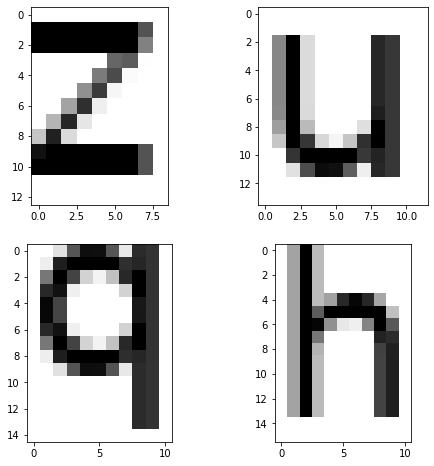

In [39]:
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (16, 9)
plt.rcParams["image.cmap"] = 'gray'

img = utils.read_img('haystack.png')
i_z = utils.read_img('letter-z.png')
i_u = utils.read_img('letter-u.png')
i_q = utils.read_img('letter-q.png')
i_h = utils.read_img('letter-h.png')
i_pattern = utils.read_img('word-pattern.png')

fig = plt.figure(figsize=(8, 8))

fig.add_subplot(2, 2, 1)
plt.imshow(i_z)

fig.add_subplot(2, 2, 2)
plt.imshow(i_u)

fig.add_subplot(2, 2, 3)
plt.imshow(i_q)

fig.add_subplot(2, 2, 4)
plt.imshow(i_h)

plt.show()